<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ajuarezjc/blob/main/RegresionLinearPolinomial_A01168444.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [145]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [146]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [147]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

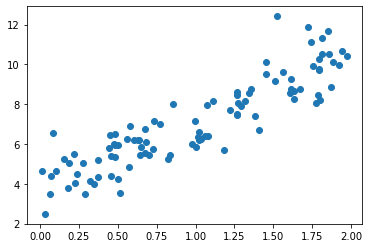

In [148]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [149]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [150]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [151]:
#X_fit[]

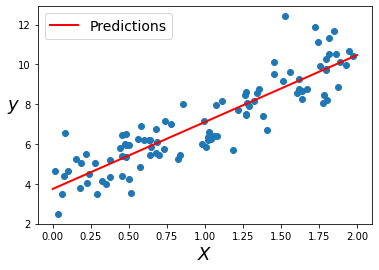

In [152]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [153]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [154]:
X_new.shape

(2, 1)

In [155]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [156]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [157]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [158]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

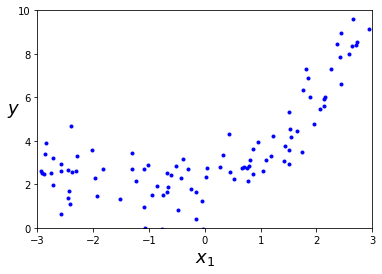

In [159]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [160]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [161]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [162]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [163]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [164]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [165]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

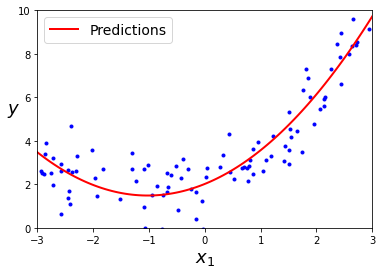

In [166]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [167]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [168]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [169]:
len(X)

1000

In [170]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

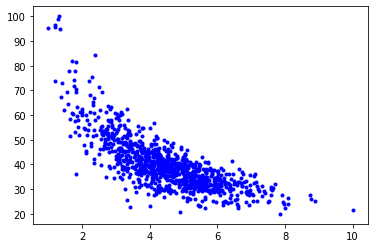

In [171]:
plt.plot(X,y,'b.')

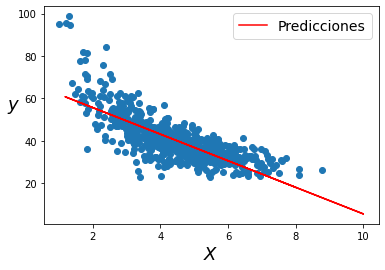

In [172]:
#lineal
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
mae_list = []
r2_list = []

# Linear Regression

lr = LinearRegression(fit_intercept = True)
lr.fit(x_train, y_train)
y_hat = lr.predict(x_test)


plt.scatter(x_train, y_train)
plt.plot(x_test, y_hat, "r-", label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)


In [173]:
# Equation
print("Equation: Y = {}X + {}".format(lr.coef_, lr.intercept_))

Equation: Y = [-6.27560244]X + 68.18360938804265


In [174]:
# Errors
from sklearn import metrics
from sklearn.metrics import r2_score
mae_lr = metrics.mean_absolute_error(y_test, y_hat)
mae_list.append(mae_lr)
r2_lr = r2_score(y_test, y_hat)
r2_list.append(r2_lr)

print("Errors from LinearRegression")
print("MAE LR:", mae_lr)
print("R2 LR:", r2_lr)

Errors from LinearRegression
MAE LR: 4.966167211490924
R2 LR: 0.5666859743286023


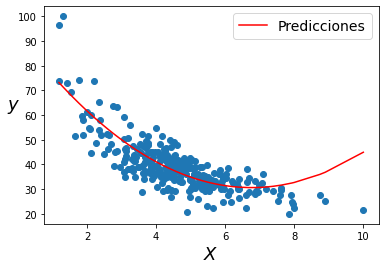

In [175]:
#polinomial

# Getting Pol Features
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree = 2, include_bias=False)
x_train_poly = poly_feat.fit_transform(x_train)
x_test_poly = poly_feat.fit_transform(x_test)

# Running LR with PolyFeatures
lr_poly = LinearRegression(fit_intercept = True)
lr_poly.fit(x_train_poly, y_train)

y_poly_hat = lr_poly.predict(x_test_poly)

# Graph
order = np.argsort(x_test.values.ravel())
sorted_x_poly = x_test.values.ravel()[order]
sorted_y_poly = y_test.values.ravel()[order]
sorted_y_hat_poly = y_poly_hat[order]

plt.scatter(x_test, y_test)
plt.plot(sorted_x_poly, sorted_y_hat_poly, "r-", label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)

In [176]:
# Equation for LR Polynomial

print("Equation:")
print('Y = {}*X^2 + {}*X + {}'.format(lr_poly.coef_[1], lr_poly.coef_[0],lr_poly.intercept_))


Equation:
Y = 1.3665181844597762*X^2 + -18.48725956628395*X + 93.17557762076862


In [177]:
# Errors for Poly LR

mae_lr_p = metrics.mean_absolute_error(y_test, y_poly_hat)
mae_list.append(mae_lr_p)
r2_lr_p = r2_score(y_test, y_poly_hat)
r2_list.append(r2_lr_p)

print("Errors from PolyLinearRegression")
print("MAE LRPoly:", mae_lr_p)
print("R2 LRPoly:", r2_lr_p)

Errors from PolyLinearRegression
MAE LRPoly: 4.621536782078726
R2 LRPoly: 0.6496536298133441


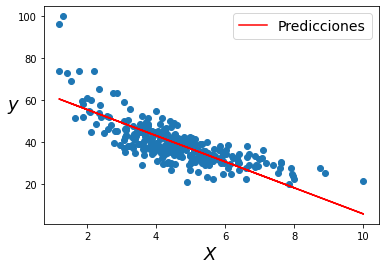

In [178]:
# RidgeRegression
from sklearn.linear_model import Ridge

rr = Ridge(alpha = 10, fit_intercept = True)
rr.fit(x_train, y_train)
x_ridge = x_test
y_hat_ridge = rr.predict(x_ridge)

plt.scatter(x_test, y_test)
plt.plot(x_ridge, y_hat_ridge, "r-", label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)

In [179]:
# Errors for Ridge

mae_lr_rr = metrics.mean_absolute_error(y_test, y_hat_ridge)
mae_list.append(mae_lr_rr)
r2_lr_rr = r2_score(y_test, y_hat_ridge)
r2_list.append(r2_lr_rr)

print("Errors from RidgeRegression")
print("MAE RR:", mae_lr_rr)
print("R2 RR:", r2_lr_rr)

Errors from RidgeRegression
MAE RR: 4.950935230762346
R2 RR: 0.5680419479285249


In [180]:
# Equation for Ridge

print("Equation")
print("Y = {}*X + {}".format(rr.coef_,rr.intercept_))

Equation
Y = [-6.22247438]*X + 67.94889697269001


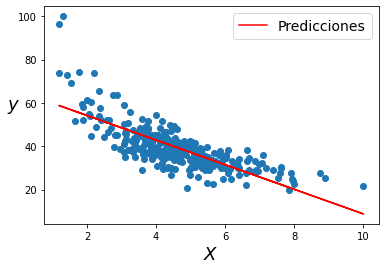

In [181]:
# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1, fit_intercept = True)
lasso.fit(x_train, y_train)
x_lasso = x_test
y_hat_lasso = lasso.predict(x_lasso)

plt.scatter(x_test, y_test)
plt.plot(x_lasso, y_hat_lasso, "r-", label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)

In [182]:
# Errors for Lasso

mae_lr_l = metrics.mean_absolute_error(y_test, y_hat_lasso)
mae_list.append(mae_lr_l)
r2_lr_l = r2_score(y_test, y_hat_lasso)
r2_list.append(r2_lr_l)

print("Errors from Lasso")
print("MAE Lasso:", mae_lr_l)
print("R2 Lasso:", r2_lr_l)

Errors from Lasso
MAE Lasso: 4.833326544970238
R2 Lasso: 0.5757406033865122


In [183]:
# Equation 

print("Lasso Equation")
print("Y = {}*X + {}".format(lasso.coef_,lasso.intercept_))

Lasso Equation
Y = [-5.67793595]*X + 65.54320171783722


['LR', 'PolyLR', 'Ridge', 'Lasso']
[4.966167211490924, 4.621536782078726, 4.950935230762346, 4.833326544970238]


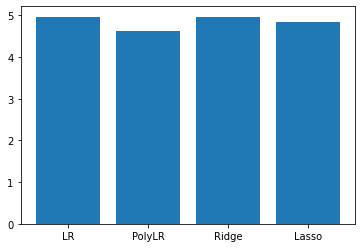

In [184]:
# Graphs for MAE Errors

names = ["LR","PolyLR","Ridge","Lasso"]
print(names)
print(mae_list)
plt.bar(names,mae_list)
plt.show()

['LR', 'PolyLR', 'Ridge', 'Lasso']
[0.5666859743286023, 0.6496536298133441, 0.5680419479285249, 0.5757406033865122]


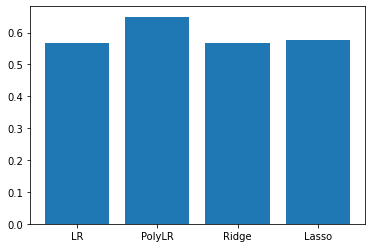

In [185]:
# Graphs for R2 Errors
print(names)
print(r2_list)
plt.bar(names,r2_list)
plt.show()

### Conclusiones Ejercicio 1

* Se usa una particion 70/30 para el entrenamiento y prueba de datos
* Se encuentra que el método de PolynomialLinearRegression es el mejor método para realizar las predicciones
* Su R2 está por encima de los demás métodos
* El MAE está un punto por debajo de los demás métodos, mostrando que sigue mejor los datos, y según las gráficas del modelo, se puede encontrar un mejor seguimiento cuando los datos se encuentran en las variaciones medias, donde los demás métodos tienen mayores errores

In [186]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

NameError: ignored

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

In [ ]:
#tu codigo aquí